In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.cm as cm
import random
import glob
import os
from skimage.segmentation import chan_vese
import numpy as np
import PIL 
from PIL import Image 

# Display
# from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
import my_functions as mf

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nibabel as nib #for loading nii files
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf #for deep learning

In [13]:
data = pd.read_csv('especialists_dataset//metadata.csv', sep=';')
data.head()

,ct_scan,lung_mask,infection_mask,lung_and_infection_mask
0,especialists_dataset//ct_scans//coronacases_or...,especialists_dataset//lung_mask//coronacases_0...,especialists_dataset//infection_mask//coronaca...,especialists_dataset//lung_and_infection_mask/...
1,especialists_dataset//ct_scans//coronacases_or...,especialists_dataset//lung_mask//coronacases_0...,especialists_dataset//infection_mask//coronaca...,especialists_dataset//lung_and_infection_mask/...
2,especialists_dataset//ct_scans//coronacases_or...,especialists_dataset//lung_mask//coronacases_0...,especialists_dataset//infection_mask//coronaca...,especialists_dataset//lung_and_infection_mask/...
3,especialists_dataset//ct_scans//coronacases_or...,especialists_dataset//lung_mask//coronacases_0...,especialists_dataset//infection_mask//coronaca...,especialists_dataset//lung_and_infection_mask/...
4,especialists_dataset//ct_scans//coronacases_or...,especialists_dataset//lung_mask//coronacases_0...,especialists_dataset//infection_mask//coronaca...,especialists_dataset//lung_and_infection_mask/...


In [14]:
def read_nii(filepath):
   '''
   Reads .nii file and returns pixel array
   '''
   ct_scan = nib.load(filepath)
   array   = ct_scan.get_fdata()
   array   = np.rot90(np.array(array))
   return(array)

In [21]:
data.loc[1,'ct_scan']

'especialists_dataset//ct_scans//coronacases_org_002.nii'

In [15]:
# Read sample
sample_ct   = read_nii(data.loc[1,'ct_scan'])
sample_lung = read_nii(data.loc[1,'lung_mask'])
sample_infe = read_nii(data.loc[1,'infection_mask'])
sample_all  = read_nii(data.loc[1,'lung_and_infection_mask'])

Text(0.5, 1.0, 'Lung and Infection Mask')

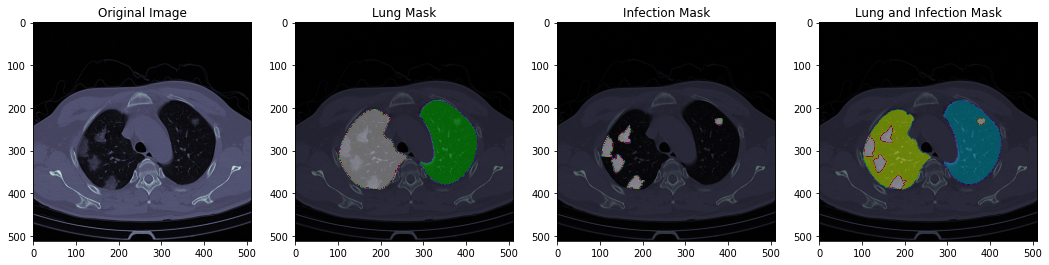

In [16]:
fig = plt.figure(figsize = (18,15))
plt.subplot(1,4,1)
plt.imshow(sample_ct[..., 150], cmap = 'bone')
plt.title('Original Image')

plt.subplot(1,4,2)
plt.imshow(sample_ct[..., 150], cmap = 'bone')
plt.imshow(sample_lung[..., 150],alpha = 0.5, cmap = 'nipy_spectral')
plt.title('Lung Mask')

plt.subplot(1,4,3)
plt.imshow(sample_ct[..., 150], cmap = 'bone')
plt.imshow(sample_infe[..., 150], alpha = 0.5, cmap = 'nipy_spectral')
plt.title('Infection Mask')

plt.subplot(1,4,4)
plt.imshow(sample_ct[..., 150], cmap = 'bone')
plt.imshow(sample_all[..., 150], alpha = 0.5, cmap = 'nipy_spectral')
plt.title('Lung and Infection Mask')

In [19]:
import my_functions as mf

In [22]:
sample_ct[..., 150]

array([[ -984., -1023., -1005., ...,  -992.,  -997.,  -993.],
       [ -983.,  -951.,  -998., ..., -1009., -1009.,  -983.],
       [-1009.,  -994.,  -976., ...,  -991.,  -993.,  -978.],
       ...,
       [-1004., -1023., -1001., ...,  -975., -1009., -1023.],
       [-1006.,  -864.,  -987., ..., -1023.,  -968.,  -988.],
       [ -949., -1005., -1023., ..., -1023.,  -984., -1000.]])

In [25]:
sample_image = sample_ct[:, :, 150]

In [35]:
def prepare_sample_image(image):
   if len(image.shape) != 2:
      print('Erro: Check valid dimensions')
      return
   
   # New axis:
   sample_image = image[np.newaxis, :, :, np.newaxis]
   # Expand dimensions
   new_image = np.tile(sample_image[np.newaxis, :, :, np.newaxis], 3)
   # Resize to model predict
   img = keras.preprocessing.image.load_img(img_path, target_size=size)
   

In [37]:
sample_image.shape

(512, 512)

In [28]:
sample_image[np.newaxis, :, :, np.newaxis]

(1, 512, 512, 1)

In [29]:
model = keras.models.load_model("my_logs\\run_2021_11_01-20_46_49")

In [32]:
np.tile(sample_image[np.newaxis, :, :, np.newaxis], 3).shape

(1, 512, 512, 3)

In [38]:
sample_ct   = read_nii(data.loc[1,'ct_scan'])

In [47]:
sample_ct.shape

(512, 512, 200)

In [40]:
filepath = data.loc[1,'ct_scan']
ct_scan = nib.load(filepath)
array   = ct_scan.get_fdata()
array   = np.rot90(np.array(array))

In [69]:
filepath

'especialists_dataset//ct_scans//coronacases_org_002.nii'

In [45]:
array.shape

(512, 512, 200)

In [42]:
ct_scan.shape

(512, 512, 200)

In [44]:
ct_scan.get_fdata().shape

(512, 512, 200)

In [46]:
from skimage.transform import rescale, resize

In [57]:
image_resized = resize(
   sample_ct[..., 150], 
   (1, 180, 180, 3),
   anti_aliasing=True)

In [67]:
model.predict(image_resized)

array([[0.99582446]], dtype=float32)

In [68]:
batch_size = 32
img_height = 180
img_width = 180
image_size = (img_height, img_width)

In [70]:
# Remove last layer's softmax
model.layers[-1].activation = None
last_layer_grad_cam='conv_7b_ac'
grad_colormap="seismic"
original_image_colormap="grayscale"
# Generate class activation heatmap
last_conv_layer_name = mf.find_target_layer(model)
heatmap = mf.make_gradcam_heatmap(image_resized, model, last_conv_layer_name=last_layer_grad_cam)

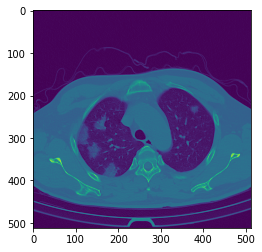

In [79]:
plt.imshow(sample_ct[:, :, 150].astype(int))

In [83]:
import matplotlib

matplotlib.image.imsave('name.png', sample_ct[:, :, 150])

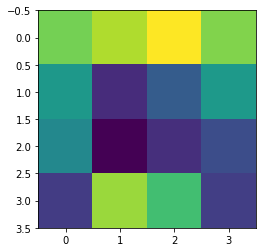

In [72]:
plt.imshow(heatmap)

In [ ]:
img_path = "datasetsSARS-COV-2 Ct-Scan\\COVID-positive\\Covid (305).png"
superimposed_img = mf.superimpose_gradcam( 
   current_model=model,
   img_path=img_path,
   image_size=image_size,
   grad_colormap="seismic",
   original_image_colormap="grayscale",
   last_layer_grad_cam='conv_7b_ac')

In [84]:
data_dir = 'datasetsSARS-COV-2 Ct-Scan-seg_join'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode='int',
  subset="training",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3356 files belonging to 2 classes.
Using 2685 files for training.
Found 3356 files belonging to 2 classes.
Using 671 files for validation.


In [89]:
path = "datasetsSARS-COV-2 Ct-Scan\\COVID-positive\\Covid (2).png"
result_array = mf.get_img_array(path, image_size)

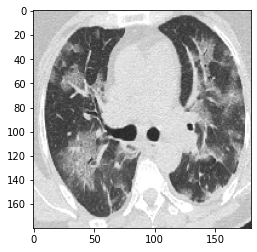

In [93]:
plt.imshow(result_array[0, :, :, :].astype(int))

In [99]:
image_resized.min()

-646.3914381028869

In [100]:
image_resized.max()

-279.748430672518

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


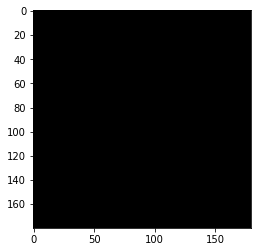

In [96]:
plt.imshow(image_resized[0, :, :, :].astype(int))